In [1]:
'''
    Import packages and modules from Python Standard Library and Third party libraries.
'''
#Import from python standard library
import os

#Import from third party libraries 
import cv2
import glob
import h5py
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import gray2rgb, rgb2gray
from skimage.transform import resize

%matplotlib inline

### Create Labeled Digit Sequence Dataset 
We will read data from multiple directories using `glob and opencv` and create label for each image of each multi-digit directory. 

In [11]:
#define list to store the dataset 
dataset_mixed = []
#define list to store the data labels 
mixed_data_labels = []
raw_labels = []
#list of main-directory names
#DIRs = ['RB','BR']
DIRs = ['S17_RB','S11_BR','OverRB', 'OverBR']
#iterate over each main-directory name
for DIR in DIRs:
    #join path with each main-directory name
    path = os.path.join('C:/Users/rashi/Desktop/Elevator/'+str(DIR)+'/*/*')
    #Extract the path of all sub-directories inside each main-directory 
    
    for directory in glob.glob(path):
        #print('Directory path:',directory)
        sub_path = os.path.join(directory+'/*.jpg')
        #extract path of all images in sub-directory
        image_paths = glob.glob(sub_path)
        #split the directory path and extract directory name
        labels = directory.split('\\')[-1]
        #Iterate over each image path to read the image 
        for image_path in image_paths:
            image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
            image = cv2.resize(image,dsize=(112,112), interpolation= cv2.INTER_AREA)
            #convert to rgb if grayscale image 
            if len(image.shape)==2:
                image = gray2rgb(image)
             
            
            raw_labels.append(labels)
            #if label is for single digit image, then append 10 at the second place 
            label= [int(i) for i in labels]
            '''
            if len(label)!=2:
                iterations = 2-len(label)
                for _ in range(iterations):
                    label.append(10)
            '''
            if len(label)==2:
                 #append image to dataset list  
                dataset_mixed.append(image)
                mixed_data_labels.append(np.array(label))
            label=0
#convert dataset and data_labels to numpy array        
dataset_mixed = np.array(dataset_mixed)
mixed_data_labels = np.array(mixed_data_labels)

print('Dataset Shape: {0} Labels Shape: {1}'.format(dataset_mixed.shape, mixed_data_labels.shape))

Dataset Shape: (4297, 112, 112, 3) Labels Shape: (4297, 2)


In [9]:
raw_labels = pd.Series(raw_labels)
df = pd.DataFrame()
df['labels'] = raw_labels

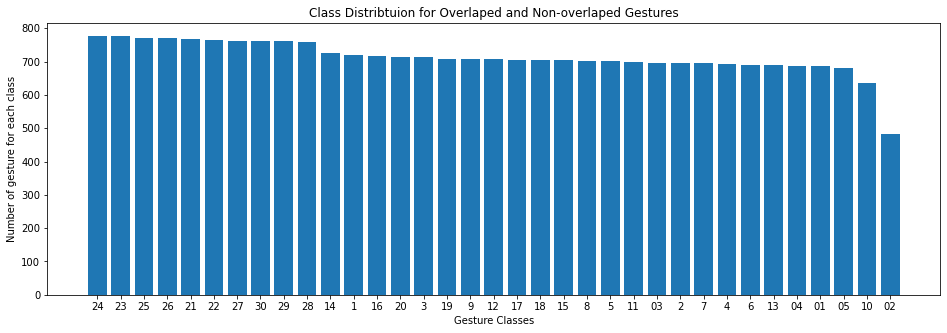

In [10]:
#Count the occurences of each class to calculate each class distribution
class_label_distribution = df['labels'].value_counts()

#sort the gestures class distribution by value
class_label_distribution.sort_values(inplace=True, ascending= False)

#plot the gestures class distribution
plt.figure(figsize=(16,5))
plt.bar(class_label_distribution.index, class_label_distribution.values)
plt.title('Class Distribtuion for Overlaped and Non-overlaped Gestures')
plt.xlabel('Gesture Classes')
_=plt.ylabel('Number of gesture for each class')
plt.savefig('mixed_label_distribution.jpg')

In [11]:
#define list to store the dataset 
dataset = []
#define list to store the data labels 
data_labels = []
raw_labels = []
#list of main-directory names
DIRs = ['S1','S2','S3','S4']

#iterate over each main-directory name
for DIR in DIRs:
    #join path with each main-directory name
    path = os.path.join('C:/Users/rashi/Desktop/Elevator/'+str(DIR)+'/overlap/*')
    #Extract the path of all sub-directories inside each main-directory 
    
    for directory in glob.glob(path):
        #print('Directory path:',directory)
        sub_path = os.path.join(directory+'/*.jpg')
        #extract path of all images in sub-directory
        image_paths = glob.glob(sub_path)
        #split the directory path and extract directory name
        labels = directory.split('\\')[-1]
        #Iterate over each image path to read the image 
        for image_path in image_paths:
            image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
            image = cv2.resize(image,dsize=(112,112), interpolation= cv2.INTER_AREA)
            #convert to rgb if grayscale image 
            if len(image.shape)==2:
                image = gray2rgb(image)
            #append image to dataset list    
            dataset.append(image)
            raw_labels.append(labels)
            #if label is for single digit image, then append 10 at the second place 
            label= [int(i) for i in labels]
            if len(label)!=2:
                iterations = 2-len(label)
                for _ in range(iterations):
                    label.append(10)
            data_labels.append(np.array(label))
        label=0
#convert dataset and data_labels to numpy array        
dataset = np.array(dataset)
data_labels = np.array(data_labels)

print('Dataset Shape: {0} Labels Shape: {1}'.format(dataset.shape, data_labels.shape))

Dataset Shape: (5487, 112, 112, 3) Labels Shape: (5487, 2)


In [12]:
raw_labels = pd.Series(raw_labels)
df = pd.DataFrame()
df['labels'] = raw_labels

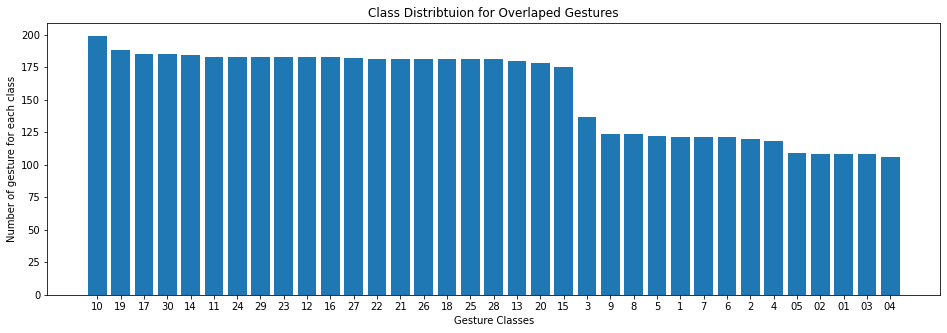

In [13]:
#Count the occurences of each class to calculate each class distribution
class_label_distribution = df['labels'].value_counts()

#sort the gestures class distribution by value
class_label_distribution.sort_values(inplace=True, ascending= False)

#plot the gestures class distribution
plt.figure(figsize=(16,5))
plt.bar(class_label_distribution.index, class_label_distribution.values)
plt.title('Class Distribtuion for Overlaped Gestures')
plt.xlabel('Gesture Classes')
_=plt.ylabel('Number of gesture for each class')
plt.savefig('overlap_label_distribution.jpg')

In [14]:
#define list to store the dataset 
dataset = []
#define list to store the data labels 
data_labels = []
raw_labels = []
#list of main-directory names
DIRs = ['S1','S2','S3','S4']

#iterate over each main-directory name
for DIR in DIRs:
    #join path with each main-directory name
    path = os.path.join('C:/Users/rashi/Desktop/Elevator/'+str(DIR)+'/grey_separate/*')
    #Extract the path of all sub-directories inside each main-directory 
    
    for directory in glob.glob(path):
        #print('Directory path:',directory)
        sub_path = os.path.join(directory+'/*.jpg')
        #extract path of all images in sub-directory
        image_paths = glob.glob(sub_path)
        #split the directory path and extract directory name
        labels = directory.split('\\')[-1]
        #Iterate over each image path to read the image 
        for image_path in image_paths:
            image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
            image = cv2.resize(image,dsize=(112,112), interpolation= cv2.INTER_AREA)
            #convert to rgb if grayscale image 
            if len(image.shape)==2:
                image = gray2rgb(image)
            #append image to dataset list    
            dataset.append(image)
            raw_labels.append(labels)
            #if label is for single digit image, then append 10 at the second place 
            label= [int(i) for i in labels]
            if len(label)!=2:
                iterations = 2-len(label)
                for _ in range(iterations):
                    label.append(10)
            data_labels.append(np.array(label))
        label=0
#convert dataset and data_labels to numpy array        
dataset = np.array(dataset)
data_labels = np.array(data_labels)

print('Dataset Shape: {0} Labels Shape: {1}'.format(dataset.shape, data_labels.shape))

Dataset Shape: (19459, 112, 112, 3) Labels Shape: (19459, 2)


In [15]:
raw_labels = pd.Series(raw_labels)
df = pd.DataFrame()
df['labels'] = raw_labels

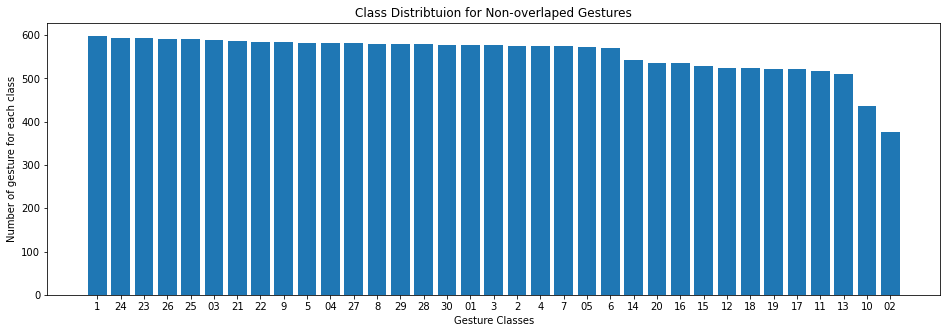

In [16]:
#Count the occurences of each class to calculate each class distribution
class_label_distribution = df['labels'].value_counts()

#sort the gestures class distribution by value
class_label_distribution.sort_values(inplace=True, ascending= False)

#plot the gestures class distribution
plt.figure(figsize=(16,5))
plt.bar(class_label_distribution.index, class_label_distribution.values)
plt.title('Class Distribtuion for Non-overlaped Gestures')
plt.xlabel('Gesture Classes')
_=plt.ylabel('Number of gesture for each class')
plt.savefig('Non-overlap_label_distribution.jpg')

### Boolean Masking to Randomly Select Test Dataset
In computer science, a mask or bitmask is data that is used for bitwise operations, particularly in a bit field. Using a mask, multiple bits in a byte, nibble, word etc. can be set either on, off or inverted from on to off (or vice versa) in a single bitwise operation.

In [12]:
def random_sample(N,K):
    """
        Return a bolean mask with size N and K Selections 
    """
    mask = np.array([False]*(N-K) + [True]*K)
    np.random.shuffle(mask)
    return mask

sample1 = random_sample(dataset_mixed.shape[0], 3000)
#sample2 = random_sample(dataset_mixed.shape[0], 2500)

X_test = dataset_mixed[sample1]
y_test = mixed_data_labels[sample1]

#X_val = dataset_mixed[sample2]
#y_val = mixed_data_labels[sample2]

#sample = sample1+sample2

X_train = dataset_mixed[~sample1]
y_train = mixed_data_labels[~sample1]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1297, 112, 112, 3), (1297, 2), (3000, 112, 112, 3), (3000, 2))

### Shuffle training and test data
We will shuffle training and test data using `sklearn.utils import shuffle` module.

In [13]:
X_train, y_train = shuffle(X_train,y_train, random_state=123)
X_test, y_test = shuffle(X_test,y_test, random_state=123)
#X_val, y_val = shuffle(X_val,y_val, random_state=123)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1297, 112, 112, 3), (1297, 2), (3000, 112, 112, 3), (3000, 2))

### Helper function for visulizing Images

In [14]:
def plot_images(images, nrows, ncols, cls_true, cls_pred=None):
    """ Helper function for plotting nrows * ncols images
    """
    fig, axes = plt.subplots(nrows, ncols, figsize=(16, 2*nrows))
    for i, ax in enumerate(axes.flat): 
        # Pretty string with actual label
        true_number = ''.join(str(x) for x in cls_true[i] if x != 10)
        if cls_pred is None:
            title = "True: {0}".format(true_number)
        else:
            # Pretty string with predicted label
            pred_number = ''.join(str(x) for x in cls_pred[i] if x != 10)
            title = "True: {0}, Pred: {1}".format(true_number, pred_number)  
        ax.imshow(images[i])
        ax.set_title(title)   
        ax.set_xticks([]); ax.set_yticks([])

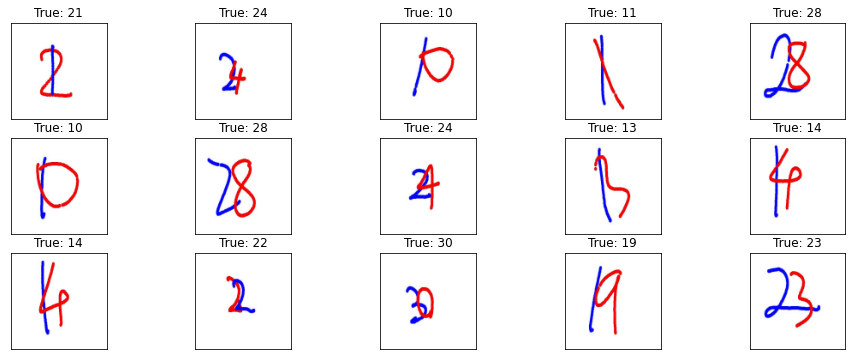

In [15]:
plot_images(X_train,3,5, y_train)

In [16]:
# Create file
h5f = h5py.File('data/2010_overlap_test.h5', 'w')

# Store the datasets
h5f.create_dataset('train_dataset', data=X_train)
h5f.create_dataset('train_labels', data=y_train)
h5f.create_dataset('test_dataset', data=X_test)
h5f.create_dataset('test_labels', data=y_test)
#h5f.create_dataset('val_dataset', data=X_val)
#h5f.create_dataset('val_labels', data=y_val)
# Close the file
h5f.close()

In [17]:
def rgb2gray(images):
    """Convert images from rbg to grayscale
    """
    greyscale = np.dot(images, [0.2989, 0.5870, 0.1140])
    return np.expand_dims(greyscale, axis=3)

# Transform the images to greyscale
X_train = rgb2gray(X_train).astype(np.float32)
X_test = rgb2gray(X_test).astype(np.float32)
#X_val = rgb2gray(X_val).astype(np.float32)

In [18]:
# Create file
h5f = h5py.File('data/2010_overlap_test_grey.h5', 'w')

# Store the datasets
h5f.create_dataset('train_dataset', data=X_train)
h5f.create_dataset('train_labels', data=y_train)
h5f.create_dataset('test_dataset', data=X_test)
h5f.create_dataset('test_labels', data=y_test)
#h5f.create_dataset('val_dataset', data=X_val)
#h5f.create_dataset('val_labels', data=y_val)

# Close the file
h5f.close()